Week 3 Notebook: Feature Engineering
===============================================================

Many different kinds of features have been specially engineered to perform b-tagging. We will consider several of these today.

## b hadrons

B hadrons contain bottom quarks. 
These hadrons are unstable, meaning they naturally (and spontaneously) decay to hadrons containing lighter quarks, after a period of time (with a known median lifetime). 

Because of the large mass difference between bottom quarks and the lighter quarks, the lifetime of b hadrons tends to be relatively long: around $10^{-12}$ s. 
Given the fact that they are traveling near the speed of light, this means they can travel $O$(mm) in the detector before dacaying.
The particle sproduced from this decay also tend to be higher energy

Therefore, we can consider the properties of *displaced tracks* and *secondary vertices* (points of origin of collections of displaced tracks).
In particular we quantify how displaced a track is in terms of its *impact parameter*.

## Single b-tagging

For single b-tagging, consider the following image:
<img src="http://cms-results.web.cern.ch/cms-results/public-results/publications/BTV-16-002/CMS-BTV-16-002_Figure_001.png" alt="b-tagging" width="500">

For more information, read...

## Double b-tagging

For double b-tagging, consider the following image:
<img src="Hbb.png" alt="b-tagging" width="500">

For this, we can also take advantage of the so-called *jet substructure*. For more information, read...


In [ ]:
import uproot
f = uproot.open('root://eospublic.cern.ch//eos/opendata/cms/datascience/HiggsToBBNtupleProducerTool/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC/train/ntuple_merged_10.root')

In [ ]:
tree = f['deepntuplizer/tree']

In [ ]:
labels = tree.arrays(branches=['label_QCD_b', 
                               'label_QCD_bb', 
                               'label_QCD_c', 
                               'label_QCD_cc', 
                               'label_QCD_others', 
                               'label_H_bb', 
                               'sample_isQCD'], 
                     entrystop=20000)

In [18]:
# label QCD: require the sample to be QCD and any of the QCD flavors
label_QCD = labels[b'sample_isQCD'] * (labels[b'label_QCD_b']+labels[b'label_QCD_bb']+labels[b'label_QCD_c']+labels[b'label_QCD_cc']+labels[b'label_QCD_others'])

# label Hbb
label_Hbb = labels[b'label_H_bb']

In [19]:
#tree.show()
jet_features = tree.arrays(branches=['fj_pt', 
                                     'fj_sdmass',
                                     'fj_tau21',
                                     'fj_jetNTracks',
                                     'fj_trackSipdSig_0',
                                     'fj_trackSipdSig_1'],
                          entrystop=20000)

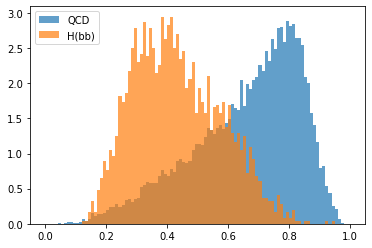

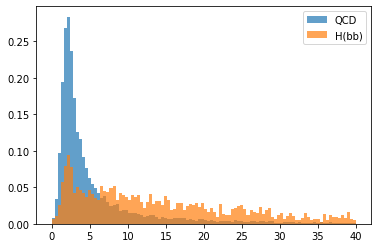

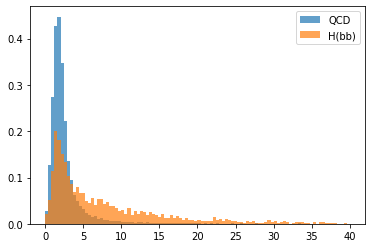

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

plt.hist(jet_features[b'fj_tau21'],weights=label_QCD,bins=np.linspace(0,1,101),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features[b'fj_tau21'],weights=label_Hbb,bins=np.linspace(0,1,101),density=True,alpha=0.7,label='H(bb)')
plt.legend()

plt.figure()
plt.hist(jet_features[b'fj_trackSipdSig_0'],weights=label_QCD,bins=np.linspace(0,40,101),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features[b'fj_trackSipdSig_0'],weights=label_Hbb,bins=np.linspace(0,40,101),density=True,alpha=0.7,label='H(bb)')
plt.legend()


plt.figure()
plt.hist(jet_features[b'fj_trackSipdSig_1'],weights=label_QCD,bins=np.linspace(0,40,101),density=True,alpha=0.7,label='QCD')
plt.hist(jet_features[b'fj_trackSipdSig_1'],weights=label_Hbb,bins=np.linspace(0,40,101),density=True,alpha=0.7,label='H(bb)')
plt.legend()


plt.show()

To read more about the features read this: http://opendata.cern.ch/record/12102


Here is a selection:


| Data variable | Type | Description |
| :---------------------- | -----------------: | :---------------------- |
| `sample_isQCD` | Float_t | Boolean that is 1 if the simulated sample corresponds to QCD multijet production |
| `fj_jetNTracks` | Float_t | Number of tracks associated with the AK8 jet |
| `fj_nSV` | Float_t | Number of SVs associated with the AK8 jet (∆R < 0.7) |
| `fj_n_sdsubjets` | Float_t | Number of soft drop subjets in the AK8 jet (up to 2) |
| `fj_mass` | Float_t | Ungroomed mass of the AK8 jet |
| `fj_phi` | Float_t | Azimuthal angle ϕ of the AK8 jet |
| `fj_pt` | Float_t | Transverse momentum of the AK8 jet |
| `fj_tau1` | Float_t | N-subjettiness variable for a 1-prong jet hypothesis |
| `fj_tau2` | Float_t | N-subjettiness variable for a 2-prong jet hypothesis |
| `fj_tau3` | Float_t | N-subjettiness variable for a 3-prong jet hypothesis |
| `fj_tau21` | Float_t | N-subjettiness variable for 2-prong vs 1-prong jet discrimination (`fj_tau2/fj_tau1`) |
| `fj_tau32` | Float_t | N-subjettiness variable for 3-prong vs 2-prong jet discrimination (`fj_tau3/fj_tau2`) |
| `fj_sdmass` | Float_t | Soft drop mass of the AK8 jet |
| `fj_ptDR` | Float_t | Transverse momentum times the ΔR between the two soft drop subjets |
| `fj_relptdiff` | Float_t | Absolute relative difference between the transverse momenta of the two softdrop subjets |
| `fj_sdn2` | Float_t | Fraction of second subjet transverse momentum times ∆R squared |
| `fj_sdsj1_axis1` | Float_t | First axis of the first subjet |
| `fj_sdsj1_axis2` | Float_t | Second axis of the first subjet |
| `fj_sdsj1_csv` | Float_t | Combined secondary vertex (CSV) b-tagging discriminant for the first subjet |
| `fj_sdsj1_eta` | Float_t | Pseudorapidity η of the first subjet |
| `fj_sdsj1_mass` | Float_t | Mass of the first subjet |
| `fj_sdsj1_mult` | Float_t | Particle multiplicity of the first subjet |
| `fj_sdsj1_phi` | Float_t | Azimuthal angle ϕ of the first subjet |
| `fj_sdsj1_pt` | Float_t | Transverse momentum of the first subjet |
| `fj_sdsj1_ptD` | Float_t | ptD variable, defined as the square root of the sum in quadrature of the transverse momentum of the subjet constituents divided by the scalar sum of the transverse momentum of the subjet constituents, for the first subjet (see [CMS-PAS-JME-13-002](https://cds.cern.ch/record/1599732)) |
| `fj_sdsj2_axis1` | Float_t | First axis of the first subjet |
| `fj_sdsj2_axis2` | Float_t | Second axis of the first subjet |
| `fj_sdsj2_csv` | Float_t | Combined secondary vertex (CSV) b-tagging discriminant for the first subject |
| `fj_sdsj2_eta` | Float_t | Pseudorapidity η of the second subjet |
| `fj_sdsj2_mass` | Float_t | Mass of the second subjet |
| `fj_sdsj2_mult` | Float_t | Particle multiplicity of the second subjet |
| `fj_sdsj2_phi` | Float_t | Azimuthal angle ϕ of the second subjet |
| `fj_sdsj2_pt` | Float_t | Transverse momentum of the second subjet |
| `fj_sdsj2_ptD` | Float_t | ptD variable, defined as the square root of the sum in quadrature of the transverse momentum of the subjet constituents divided by the scalar sum of the transverse momentum of the subjet constituents, for the second subjet (see [CMS-PAS-JME-13-002](https://cds.cern.ch/record/1599732)) |
| `fj_z_ratio` | Float_t | z ratio variable as defined in [CMS-BTV-16-002](http://cms-results.web.cern.ch/cms-results/public-results/publications/BTV-16-002/) |
| `fj_trackSipdSig_0` | Float_t | First largest track 3D signed impact parameter significance (see [CMS-BTV-16-002](http://cms-results.web.cern.ch/cms-results/public-results/publications/BTV-16-002/) ) |
| `fj_trackSipdSig_1` | Float_t | Second largest track 3D signed impact parameter significance (see [CMS-BTV-16-002](http://cms-results.web.cern.ch/cms-results/public-results/publications/BTV-16-002/) ) |
| `fj_trackSipdSig_2` | Float_t | Third largest track 3D signed impact parameter significance (see [CMS-BTV-16-002](http://cms-results.web.cern.ch/cms-results/public-results/publications/BTV-16-002/) )  |
| `fj_trackSipdSig_3` | Float_t | Fourth largest track 3D signed impact parameter significance (see [CMS-BTV-16-002](http://cms-results.web.cern.ch/cms-results/public-results/publications/BTV-16-002/) )  |
| `fj_trackSipdSig_0_0` | Float_t | First largest track 3D signed impact parameter significance associated to the first N-subjettiness axis |
| `fj_trackSipdSig_0_1` | Float_t | Second largest track 3D signed impact parameter significance associated to the first N-subjettiness axis |
| `fj_trackSipdSig_1_0` | Float_t | First largest track 3D signed impact parameter significance associated to the second N-subjettiness axis |
| `fj_trackSipdSig_1_1` | Float_t | Second largest track 3D signed impact parameter significance associated to the second N-subjettiness axis |
| `fj_trackSip2dSigAboveCharm_0` | Float_t | Track 2D signed impact parameter significance of the first track lifting the combined invariant mass of the tracks above the c hadron threshold mass (1.5 GeV) |
| `fj_trackSip2dSigAboveBottom_0` | Float_t | Track 2D signed impact parameter significance of the first track lifting the combined invariant mass of the tracks above b hadron threshold mass (5.2 GeV) |
| `fj_trackSip2dSigAboveBottom_1` | Float_t | Track 2D signed impact parameter significance of the second track lifting the combined invariant mass of the tracks above b hadron threshold mass (5.2 GeV) |
| `fj_tau0_trackEtaRel_0` | Float_t | Smallest track pseudorapidity ∆η, relative to the jet axis, associated to the first N-subjettiness axis |
| `fj_tau0_trackEtaRel_1` | Float_t | Second smallest track pseudorapidity ∆η, relative to the jet axis, associated to the first N-subjettiness axis |
| `fj_tau0_trackEtaRel_2` | Float_t | Third smallest track pseudorapidity ∆η, relative to the jet axis, associated to the first N-subjettiness axis |
| `fj_tau1_trackEtaRel_0` | Float_t | Smallest track pseudorapidity ∆η, relative to the jet axis, associated to the second N-subjettiness axis |
| `fj_tau1_trackEtaRel_1` | Float_t | Second smallest track pseudorapidity ∆η, relative to the jet axis, associated to the second N-subjettiness axis |
| `fj_tau1_trackEtaRel_2` | Float_t | Third smallest track pseudorapidity ∆η, relative to the jet axis, associated to the second N-subjettiness axis |
| `fj_tau_vertexMass_0` | Float_t | Total SV mass for the first N-subjettiness axis, defined as the invariant mass of all tracks from SVs associated with the first N-subjettiness axis |
| `fj_tau_vertexMass_1` | Float_t | Total SV mass for the second N-subjettiness axis, defined as the invariant mass of all tracks from SVs associated with the second N-subjettiness axis |
| `fj_tau_vertexEnergyRatio_0` | Float_t | SV vertex energy ratio for the first N-subjettiness axis, defined as the total energy of all SVs associated with the first N-subjettiness axis divided by the total energy of all the tracks associated with the AK8 jet that are consistent with the PV |
| `fj_tau_vertexEnergyRatio_1` | Float_t | SV energy ratio for the second N-subjettiness axis, defined as the total energy of all SVs associated with the first N-subjettiness axis divided by the total energy of all the tracks associated with the AK8 jet that are consistent with the PV |
| `fj_tau_flightDistance2dSig_0` | Float_t | Transverse (2D) flight distance significance between the PV and the SV with the smallest uncertainty on the 3D flight distance associated to the first N-subjettiness axis |
| `fj_tau_flightDistance2dSig_1` | Float_t | Transverse (2D) flight distance significance between the PV and the SV with the smallest uncertainty on the 3D flight distance associated to the second N-subjettiness axis |
| `fj_tau_vertexDeltaR_0` | Float_t | Pseudoangular distance ∆R between the first N-subjettiness axis and SV direction |